In [2]:
import pickle

In [1]:

############Adjustments##############

#options
PATH = '/media/sf_SF/Stage2021/targetedQE/' 
OPTION = 'label' # area or label
FOLDER = 'X_arrays_LA/'


## Adjustments

filename_Y_labels = 'total_y_matrix.txt'

########################



# load libraries
import pandas as pd
import os
import random
from PIL import Image
import numpy as np


#set paths
path_data_in = PATH + 'data/input/' + 'MachineLearning/'
path_data_out = PATH + 'data/output/' + 'MachineLearning/'
path_data_X = path_data_in + FOLDER #png's
path_data_y = path_data_in + 'Yarrays/' #labels


filename = path_data_y + filename_Y_labels

y = pd.read_csv(filename, sep = "\t")

filenames_X_train = []
filenames_X_test = []
directory_list = os.listdir(path_data_X)
random.shuffle(directory_list)
os.chdir(path_data_X)

i = 0
for filename in directory_list:
    if ".png" in filename :
        if i % 3 == 0: 
            filenames_X_test.append(path_data_X + filename)
        else:
            filenames_X_train.append(path_data_X + filename)
        i = i + 1
    
def load_X_if_matched_in_y(filenames_list, y):
    all_images_as_array=[]
    label=[] 
    area = []   
    global ordered_filenames
    ordered_filenames=pd.DataFrame()
    
    for filename in filenames_list:
        filename_wopath = filename.split('X_arrays_LA/')[1]
        filename_wopath = filename_wopath.strip(".png")

        matching_y = y[y.SampleTargetedcombination==filename_wopath]
        if len(matching_y) == 1:
            label.append(matching_y.iloc[0,5]) 
            ar = matching_y.iloc[0,3]
            area.append(ar)
        
            img=Image.open(filename)
            np_array = np.asarray(img)

            l,b,c = np_array.shape    
            np_array = np_array.reshape(l*b*c,)   
            all_images_as_array.append(np_array)
            
            file_area = pd.DataFrame(np.array([[filename_wopath,ar]]))
            ordered_filenames = ordered_filenames.append(file_area, ignore_index=True)
            
            
        if len(matching_y) != 1:
            continue
        
    if OPTION == 'area':
        option = area
    else:
        option = label       
    return np.array(all_images_as_array), np.array(option)
    
X_train,y_train = load_X_if_matched_in_y(filenames_X_train, y)
X_test, y_test = load_X_if_matched_in_y(filenames_X_test, y)

print(len(y_train))
print(len(X_train))
print(len(y_test))
print(len(X_test))

print(ordered_filenames)
print(len(ordered_filenames))

48
48
24
24
                             0                  1
0   200929s008_Lalanined3333D3   50149.4846369084
1   200929s034_Lalanined3333D3    768330.52074596
2   200929s028_Lalanined3333D3   862838.166204143
3   200929s029_Lalanined3333D3                0.0
4       200929s019_LLacticacid   6680258057.58968
5   200929s026_Lalanined3333D3                0.0
6     200929s020_Dopamined4HCL   586560586.120299
7       200929s032_LLacticacid   29383875954.3783
8   200929s018_Lalanined3333D3     97694.49564717
9       200929s018_LLacticacid   7043093994.58836
10  200929s038_Lalanined3333D3   70760.5452531461
11      200929s004_LLacticacid   2896500496.98071
12  200929s021_Lalanined3333D3   615267.694031375
13  200929s004_Lalanined3333D3   1068569.42913836
14      200929s030_LLacticacid   5959563623.68817
15  200929s031_Lalanined3333D3   37976.2680816883
16    200929s038_Dopamined4HCL    584967844.91675
17      200929s008_LLacticacid  7466694188.687429
18  200929s033_Lalanined3333D3   78619

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn import linear_model, datasets
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree


In [4]:
print("Fitting Random Forest regression on training set")

# Fitting the regression model to the dataset
regressor = RandomForestRegressor(n_estimators=200, max_depth=200, random_state = 18)
regressor.fit(X_train, y_train) # Using ravel() to avoid getting 'DataConversionWarning' warning message

#------------------------------------------------------------------------------------------------------------------------#


#------------------------------------------------------------------------------------------------------------------------#
print("\n")
print("Getting Model Accuracy...")

# Get regression details
#print("Estimated Coefficient = ", regressor.coef_)
#print("Estimated Intercept = ", regressor.intercept_)
print("Training Accuracy = ", regressor.score(X_train, y_train))
print("Test Accuracy = ", regressor.score(X_test, y_test))



Fitting Random Forest regression on training set


Getting Model Accuracy...
Training Accuracy =  0.9341839197000802
Test Accuracy =  0.7540747376655235


In [7]:
import pickle

In [14]:
filename = 'regressor_306_LA.sav'
pickle.dump(regressor, open(filename, 'wb'))

In [9]:
y_pred = regressor.predict(X_test)

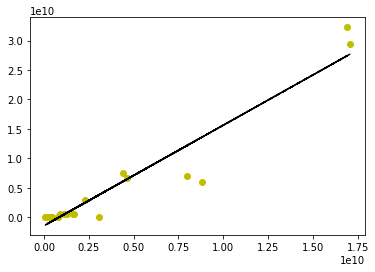

In [10]:
coef = np.polyfit(y_pred,y_test,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(y_pred,y_test, 'yo', y_pred, poly1d_fn(y_pred), '--k')

In [11]:
df = pd.DataFrame(data=y_pred)
print(df)

               0
0   2.723545e+08
1   2.088688e+08
2   7.532983e+08
3   3.262208e+08
4   4.651271e+09
5   7.644573e+08
6   1.304988e+09
7   1.706497e+10
8   4.564006e+08
9   7.986199e+09
10  4.032954e+08
11  2.298031e+09
12  2.653324e+08
13  7.643445e+07
14  8.803908e+09
15  1.820646e+08
16  1.129827e+09
17  4.422743e+09
18  3.935811e+08
19  1.618090e+09
20  1.691205e+10
21  8.662193e+08
22  1.644348e+09
23  3.051844e+09


In [12]:
result=pd.concat([ordered_filenames, df], axis=1)

In [13]:
result.to_csv('y_pred_with_regressor_306_LA.txt', sep="\t")